In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set theme
sns.set_theme(style='dark')
sns.set_palette(palette='Set2')

# Load and tidy data
%run tidy_data.py

# Load functions to estimate effect size
%run scripts.py

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 173
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 173 non-null    object  
 1   age                173 non-null    int64   
 2   variant_histology  173 non-null    category
 3   ypT_stage          173 non-null    category
 4   ypN_stage          173 non-null    category
 5   recurrence         172 non-null    category
 6   fu_recurrence      173 non-null    int64   
 7   dod                170 non-null    category
 8   doc                169 non-null    category
 9   fu_censor          173 non-null    int64   
 10  sex                173 non-null    object  
 11  year_cystectomy    173 non-null    float64 
 12  ypT_group1         173 non-null    category
 13  ypT_group2         173 non-null    category
 14  ypN_group1         173 non-null    category
 15  ypN_group2         173 non-null    category
 16  dre     

# Tumor recurrence

## Tumor recurrence and age

In [2]:
df.groupby('recurrence')['age'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
recurrence,,,,,,,,
No,116.0,67.4,10.1,24.0,63.0,68.0,74.2,86.0
Yes,56.0,64.5,9.1,42.0,58.8,64.5,70.0,82.0


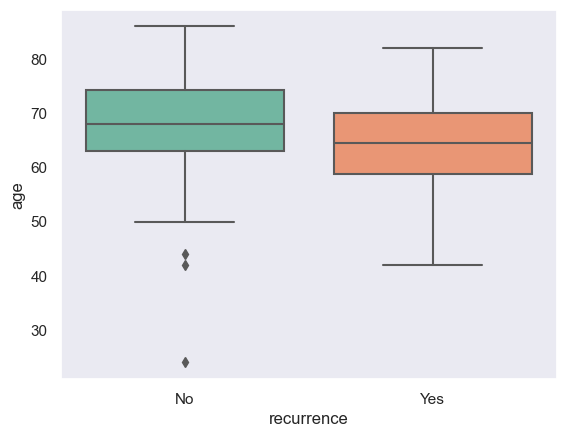

In [3]:
sns.boxplot(data=df, x='recurrence', y='age')
plt.show()

In [4]:
stats.shapiro(df['age'])

ShapiroResult(statistic=0.9704414010047913, pvalue=0.0009624111698940396)

In [5]:
stats.mannwhitneyu(*[df['age'].values for name, data in df.groupby('recurrence')])

MannwhitneyuResult(statistic=14964.5, pvalue=1.0)

In [6]:
rank_biserial_correlation(df['recurrence'], df['age'])

-0.15

## Tumor recurrence and sex

In [7]:
pd.crosstab(df['sex'], df['recurrence'])

recurrence,No,Yes
sex,,
Female,36,14
Male,80,42


In [8]:
pd.crosstab(df['sex'], df['recurrence'], normalize=True).round(2)

recurrence,No,Yes
sex,,
Female,0.21,0.08
Male,0.47,0.24


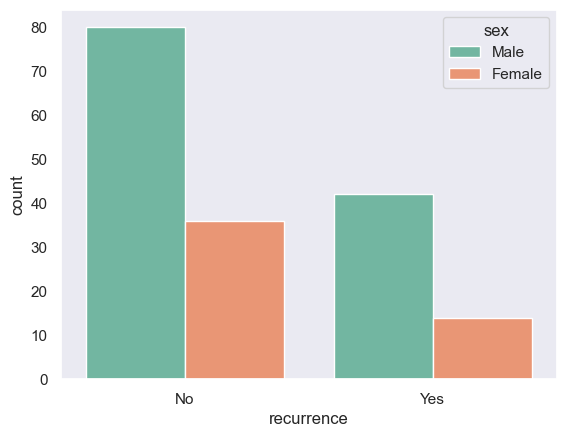

In [9]:
sns.countplot(data=df, x='recurrence', hue='sex')
plt.show()

In [10]:
stats.chi2_contingency(pd.crosstab(df['sex'], df['recurrence']))

(0.4064390696923201,
 0.5237824488717131,
 1,
 array([[33.72093023, 16.27906977],
        [82.27906977, 39.72093023]]))

In [11]:
cramers_v(df['sex'], df['recurrence'])

0.0

## Tumor recurrence and variant histology

In [12]:
pd.crosstab(df['variant_histology'], df['recurrence'])

recurrence,No,Yes
variant_histology,,
No,74,35
Yes,42,21


In [13]:
pd.crosstab(df['variant_histology'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
variant_histology,,
No,0.68,0.32
Yes,0.67,0.33


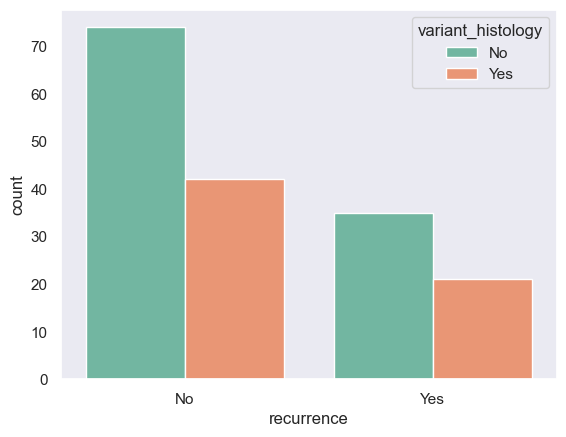

In [14]:
sns.countplot(data=df, x='recurrence', hue='variant_histology')
plt.show()

In [15]:
stats.chi2_contingency(pd.crosstab(df['variant_histology'], df['recurrence']))

(0.0,
 1.0,
 1,
 array([[73.51162791, 35.48837209],
        [42.48837209, 20.51162791]]))

In [16]:
cramers_v(df['variant_histology'], df['recurrence'])

0.0

## Tumor recurrence and ypT stage

In [17]:
pd.crosstab(df['ypT_group1'], df['recurrence'])

recurrence,No,Yes
ypT_group1,,
pT0-pTa-pTis,18,16
pT2-pT3,98,40


In [18]:
pd.crosstab(df['ypT_group1'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
ypT_group1,,
pT0-pTa-pTis,0.53,0.47
pT2-pT3,0.71,0.29


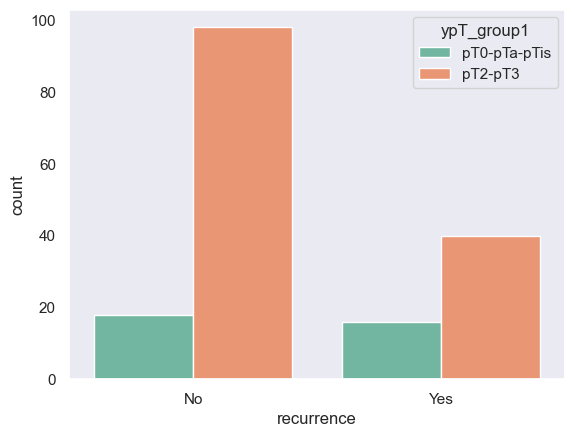

In [19]:
sns.countplot(data=df, x='recurrence', hue='ypT_group1')
plt.show()

In [20]:
stats.chi2_contingency(pd.crosstab(df['ypT_group1'], df['recurrence']))

(3.2766825620803055,
 0.07027083575917635,
 1,
 array([[22.93023256, 11.06976744],
        [93.06976744, 44.93023256]]))

In [21]:
cramers_v(df['ypT_group1'], df['recurrence'])

0.12

In [22]:
pd.crosstab(df['ypT_group2'], df['recurrence'])

recurrence,No,Yes
ypT_group2,,
pT0-pTa-pTis,18,16
pT2,48,16
pT3,50,24


In [23]:
pd.crosstab(df['ypT_group2'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
ypT_group2,,
pT0-pTa-pTis,0.53,0.47
pT2,0.75,0.25
pT3,0.68,0.32


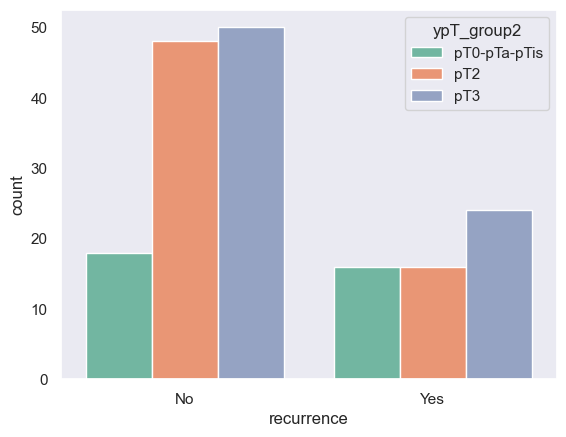

In [24]:
sns.countplot(data=df, x='recurrence', hue='ypT_group2')
plt.show()

In [25]:
stats.chi2_contingency(pd.crosstab(df['ypT_group2'], df['recurrence']))

(4.921425047185698,
 0.08537409823118274,
 2,
 array([[22.93023256, 11.06976744],
        [43.1627907 , 20.8372093 ],
        [49.90697674, 24.09302326]]))

In [26]:
cramers_v(df['ypT_group2'], df['recurrence'])

0.13

## Tumor recurrence and ypN stage

In [27]:
pd.crosstab(df['ypN_group1'], df['recurrence'])

recurrence,No,Yes
ypN_group1,,
pN0,98,40
pN1-pN2-pN3,18,16


In [28]:
pd.crosstab(df['ypN_group1'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
ypN_group1,,
pN0,0.71,0.29
pN1-pN2-pN3,0.53,0.47


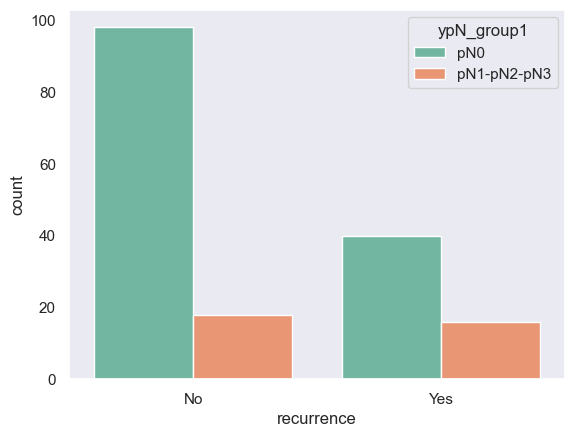

In [29]:
sns.countplot(data=df, x='recurrence', hue='ypN_group1')
plt.show()

In [30]:
stats.chi2_contingency( pd.crosstab(df['ypN_group1'], df['recurrence']))

(3.2766825620803055,
 0.07027083575917635,
 1,
 array([[93.06976744, 44.93023256],
        [22.93023256, 11.06976744]]))

In [31]:
cramers_v(df['ypN_group1'], df['recurrence'])

0.12

In [32]:
pd.crosstab(df['ypN_group2'], df['recurrence'])

recurrence,No,Yes
ypN_group2,,
pN0,98,40
pN1,10,7
pN2-pN3,8,9


In [33]:
pd.crosstab(df['ypN_group2'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
ypN_group2,,
pN0,0.71,0.29
pN1,0.59,0.41
pN2-pN3,0.47,0.53


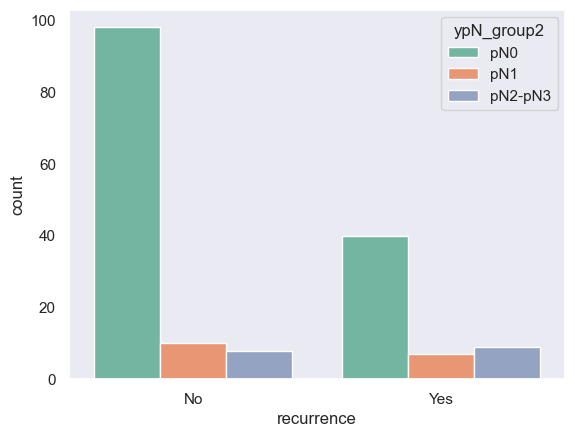

In [34]:
sns.countplot(data=df, x='recurrence', hue='ypN_group2')
plt.show()

In [35]:
stats.chi2_contingency(pd.crosstab(df['ypN_group2'], df['recurrence']))

(4.593824936271361,
 0.10056887446608738,
 2,
 array([[93.06976744, 44.93023256],
        [11.46511628,  5.53488372],
        [11.46511628,  5.53488372]]))

In [36]:
cramers_v(df['ypN_group2'], df['recurrence'])

0.12

# Death by cancer

## Death by cancer and age

In [37]:
df.groupby('doc')['age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
doc,,,,,,,,
No,151.0,66.14,10.00,24.0,60.00,67.0,73.0,86.0
Yes,18.0,68.50,9.07,50.0,61.25,70.0,76.0,80.0


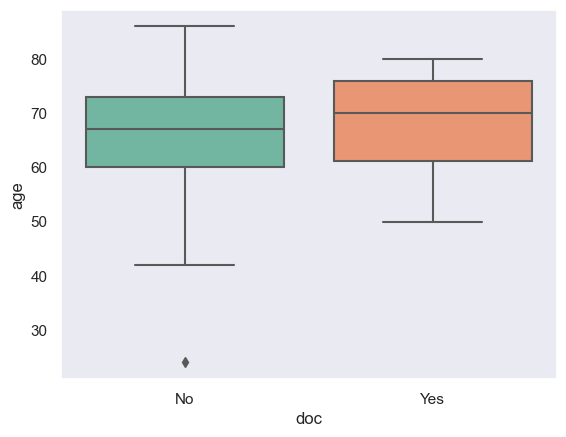

In [38]:
sns.boxplot(data=df, x='doc', y='age')
plt.show()

In [39]:
stats.mannwhitneyu(*[df['age'].values for name, data in df.groupby('doc')])

MannwhitneyuResult(statistic=14964.5, pvalue=1.0)

In [40]:
rank_biserial_correlation(df['doc'], df['age'])

0.03

## Death by cancer and sex

In [41]:
pd.crosstab(df['sex'], df['doc'])

doc,No,Yes
sex,,
Female,47,2
Male,104,16


In [42]:
pd.crosstab(df['sex'], df['doc'], normalize=True).round(2)

doc,No,Yes
sex,,
Female,0.28,0.01
Male,0.62,0.09


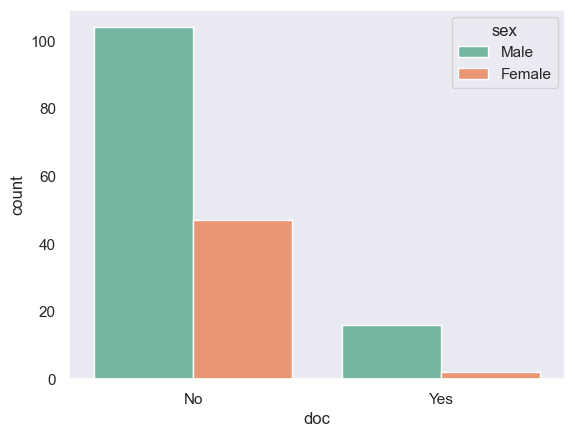

In [43]:
sns.countplot(data=df, x='doc', hue='sex')
plt.show()

In [44]:
stats.chi2_contingency(pd.crosstab(df['sex'], df['doc']))

(2.2327030085396924,
 0.13511728745409315,
 1,
 array([[ 43.78106509,   5.21893491],
        [107.21893491,  12.78106509]]))

In [45]:
cramers_v(df['sex'], df['doc'])

0.09

## Death by cancer and variant histology

In [46]:
pd.crosstab(df['variant_histology'], df['doc'])

doc,No,Yes
variant_histology,,
No,93,13
Yes,58,5


In [47]:
pd.crosstab(df['variant_histology'], df['doc'], normalize='index').round(2)

doc,No,Yes
variant_histology,,
No,0.88,0.12
Yes,0.92,0.08


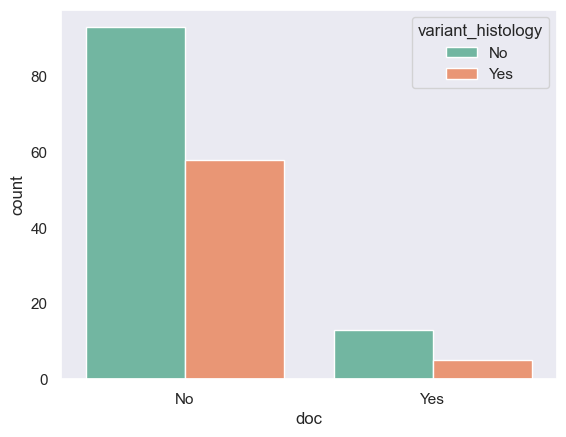

In [48]:
sns.countplot(data=df, x='doc', hue='variant_histology')
plt.show()

In [49]:
stats.chi2_contingency(pd.crosstab(df['variant_histology'], df['doc']))

(0.38938342621076194,
 0.532623677217861,
 1,
 array([[94.71005917, 11.28994083],
        [56.28994083,  6.71005917]]))

In [50]:
cramers_v(df['variant_histology'], df['doc'])

0.0

## Death by cancer and ypT stage

In [51]:
pd.crosstab(df['ypT_group1'], df['dod'])

dod,No,Yes
ypT_group1,,
pT0-pTa-pTis,25,9
pT2-pT3,105,31


In [52]:
pd.crosstab(df['ypT_group1'], df['dod'], normalize='index').round(2)

dod,No,Yes
ypT_group1,,
pT0-pTa-pTis,0.74,0.26
pT2-pT3,0.77,0.23


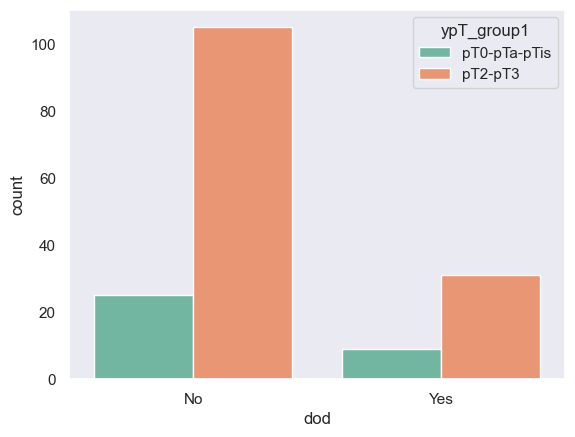

In [53]:
sns.countplot(data=df, x='dod', hue='ypT_group1')
plt.show()

In [54]:
stats.chi2_contingency(pd.crosstab(df['ypT_group1'], df['dod']))

(0.05108173076923077,
 0.8211915595601961,
 1,
 array([[ 26.,   8.],
        [104.,  32.]]))

In [55]:
cramers_v(df['ypT_group1'], df['dod'])

0.0

In [56]:
pd.crosstab(df['ypT_group2'], df['dod'])

dod,No,Yes
ypT_group2,,
pT0-pTa-pTis,25,9
pT2,50,13
pT3,55,18


In [57]:
pd.crosstab(df['ypT_group2'], df['dod'], normalize='index').round(2)

dod,No,Yes
ypT_group2,,
pT0-pTa-pTis,0.74,0.26
pT2,0.79,0.21
pT3,0.75,0.25


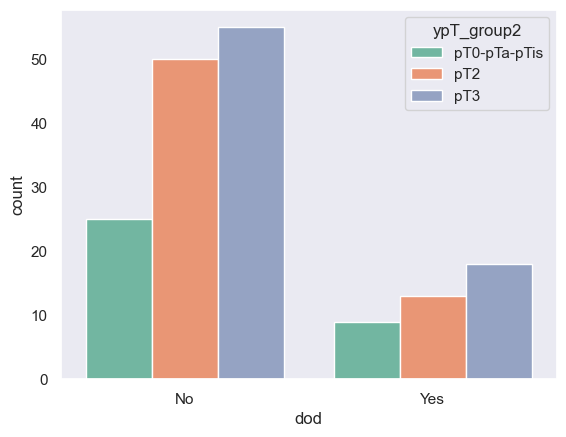

In [58]:
sns.countplot(data=df, x='dod', hue='ypT_group2')
plt.show()

In [59]:
stats.chi2_contingency(pd.crosstab(df['ypT_group2'], df['dod']))

(0.5084403800157224,
 0.7755210212652863,
 2,
 array([[26.        ,  8.        ],
        [48.17647059, 14.82352941],
        [55.82352941, 17.17647059]]))

In [60]:
cramers_v(df['ypT_group2'], df['dod'])

0.0

## Death by cancer and ypN stage

In [61]:
pd.crosstab(df['ypN_group1'], df['dod'])

dod,No,Yes
ypN_group1,,
pN0,105,31
pN1-pN2-pN3,25,9


In [62]:
pd.crosstab(df['ypN_group1'], df['dod'], normalize='index').round(2)

dod,No,Yes
ypN_group1,,
pN0,0.77,0.23
pN1-pN2-pN3,0.74,0.26


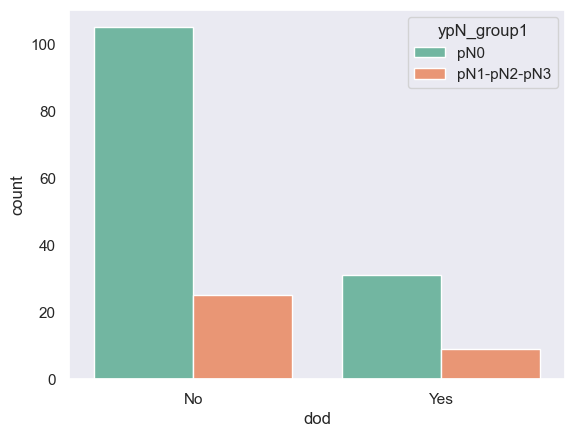

In [63]:
sns.countplot(data=df, x='dod', hue='ypN_group1')
plt.show()

In [64]:
stats.chi2_contingency(pd.crosstab(df['ypN_group1'], df['dod']))

(0.05108173076923077,
 0.8211915595601961,
 1,
 array([[104.,  32.],
        [ 26.,   8.]]))

In [65]:
cramers_v(df['ypN_group1'], df['dod'])

0.0

In [66]:
pd.crosstab(df['ypN_group2'], df['dod'])

dod,No,Yes
ypN_group2,,
pN0,105,31
pN1,13,4
pN2-pN3,12,5


In [67]:
pd.crosstab(df['ypN_group2'], df['dod'], normalize='index').round(2)

dod,No,Yes
ypN_group2,,
pN0,0.77,0.23
pN1,0.76,0.24
pN2-pN3,0.71,0.29


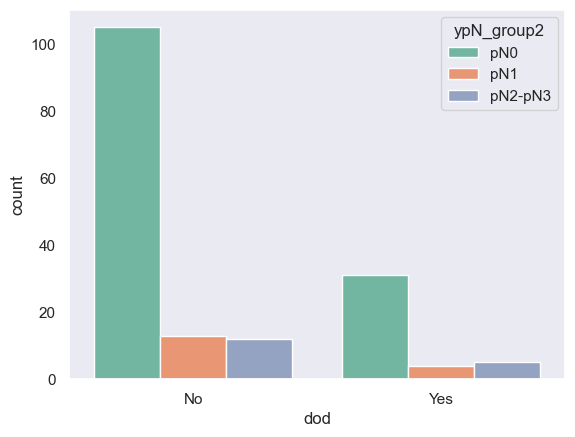

In [68]:
sns.countplot(data=df, x='dod', hue='ypN_group2')
plt.show()

In [69]:
stats.chi2_contingency(pd.crosstab(df['ypN_group2'], df['dod']))

(0.36778846153846156,
 0.8320238016903431,
 2,
 array([[104.,  32.],
        [ 13.,   4.],
        [ 13.,   4.]]))

In [70]:
cramers_v(df['ypN_group2'], df['dod'])

0.0

# Death by other causes

## Death by other causes and age

In [71]:
df.groupby('doc')['age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
doc,,,,,,,,
No,151.0,66.14,10.00,24.0,60.00,67.0,73.0,86.0
Yes,18.0,68.50,9.07,50.0,61.25,70.0,76.0,80.0


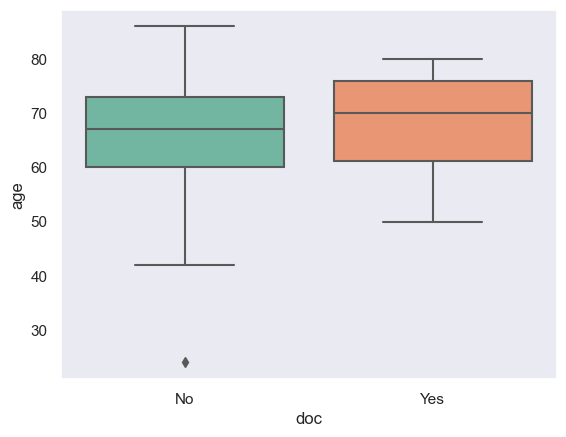

In [72]:
sns.boxplot(data=df, x='doc', y='age')
plt.show()

In [73]:
stats.mannwhitneyu(*[df['age'].values for name, data in df.groupby('doc')])

MannwhitneyuResult(statistic=14964.5, pvalue=1.0)

## Death by other causes and sex

In [74]:
pd.crosstab(df['sex'], df['doc'])

doc,No,Yes
sex,,
Female,47,2
Male,104,16


In [75]:
pd.crosstab(df['sex'], df['doc'], normalize='index').round(2)

doc,No,Yes
sex,,
Female,0.96,0.04
Male,0.87,0.13


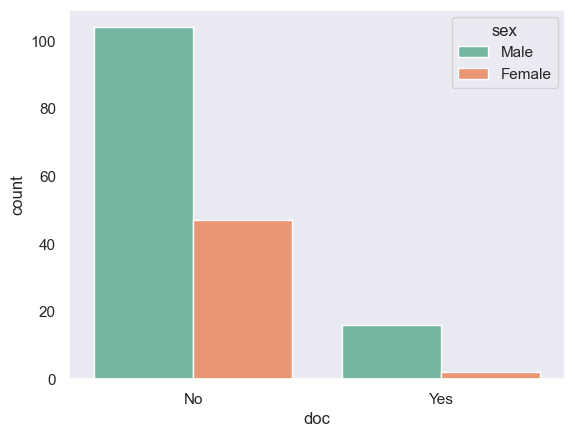

In [76]:
sns.countplot(data=df, x='doc', hue='sex')
plt.show()

In [77]:
stats.chi2_contingency(pd.crosstab(df['sex'], df['doc']))

(2.2327030085396924,
 0.13511728745409315,
 1,
 array([[ 43.78106509,   5.21893491],
        [107.21893491,  12.78106509]]))

In [78]:
cramers_v(df['sex'], df['doc'])

0.09

## Death by other causes and variant histology

In [79]:
pd.crosstab(df['variant_histology'], df['doc'])

doc,No,Yes
variant_histology,,
No,93,13
Yes,58,5


In [80]:
pd.crosstab(df['variant_histology'], df['doc'], normalize='index').round(2)

doc,No,Yes
variant_histology,,
No,0.88,0.12
Yes,0.92,0.08


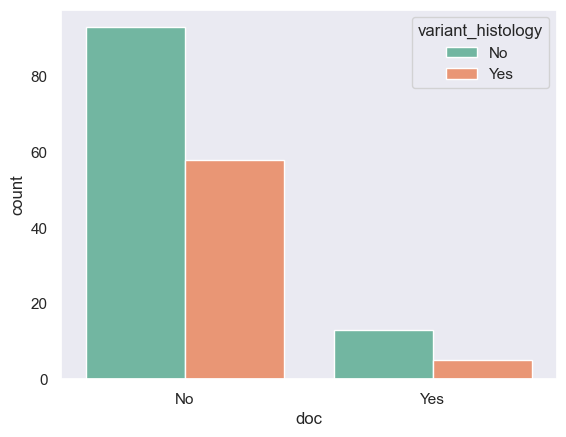

In [81]:
sns.countplot(data=df, x='doc', hue='variant_histology')
plt.show()

In [82]:
stats.chi2_contingency(pd.crosstab(df['variant_histology'], df['doc']))

(0.38938342621076194,
 0.532623677217861,
 1,
 array([[94.71005917, 11.28994083],
        [56.28994083,  6.71005917]]))

In [83]:
cramers_v(df['variant_histology'], df['doc'])

0.0

## Death by other causes and ypT stage

In [84]:
pd.crosstab(df['ypT_group1'], df['doc'])

doc,No,Yes
ypT_group1,,
pT0-pTa-pTis,31,3
pT2-pT3,120,15


In [85]:
pd.crosstab(df['ypT_group1'], df['doc'], normalize='index').round(2)

doc,No,Yes
ypT_group1,,
pT0-pTa-pTis,0.91,0.09
pT2-pT3,0.89,0.11


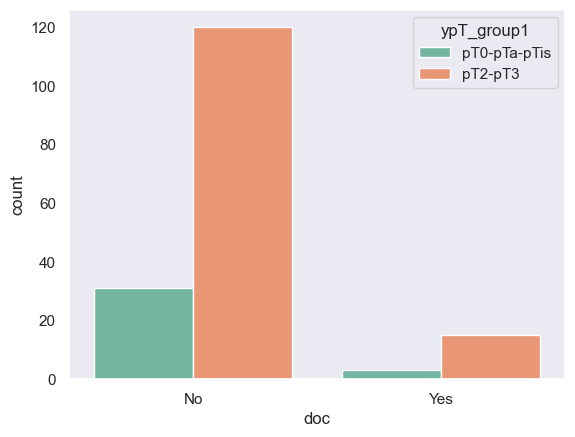

In [86]:
sns.countplot(data=df, x='doc', hue='ypT_group1')
plt.show()

In [87]:
stats.chi2_contingency(pd.crosstab(df['ypT_group1'], df['doc']))

(0.0056928833997829335,
 0.9398557245174327,
 1,
 array([[ 30.37869822,   3.62130178],
        [120.62130178,  14.37869822]]))

In [88]:
cramers_v(df['ypT_group1'], df['doc'])

0.0

In [89]:
pd.crosstab(df['ypT_group2'], df['doc'])

doc,No,Yes
ypT_group2,,
pT0-pTa-pTis,31,3
pT2,55,7
pT3,65,8


In [90]:
pd.crosstab(df['ypT_group2'], df['doc'], normalize='index').round(2)

doc,No,Yes
ypT_group2,,
pT0-pTa-pTis,0.91,0.09
pT2,0.89,0.11
pT3,0.89,0.11


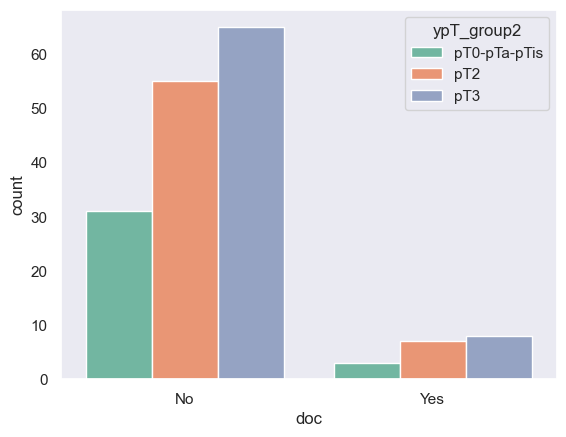

In [91]:
sns.countplot(data=df, x='doc', hue='ypT_group2')
plt.show()

In [92]:
stats.chi2_contingency(pd.crosstab(df['ypT_group2'], df['doc']))

(0.15321882031148373,
 0.9262515674164875,
 2,
 array([[30.37869822,  3.62130178],
        [55.3964497 ,  6.6035503 ],
        [65.22485207,  7.77514793]]))

In [93]:
cramers_v(df['ypT_group2'], df['doc'])

0.0

## Death by other causes and ypN stage

In [94]:
pd.crosstab(df['ypN_group1'], df['doc'])

doc,No,Yes
ypN_group1,,
pN0,120,15
pN1-pN2-pN3,31,3


In [95]:
pd.crosstab(df['ypN_group1'], df['doc'], normalize='index').round(2)

doc,No,Yes
ypN_group1,,
pN0,0.89,0.11
pN1-pN2-pN3,0.91,0.09


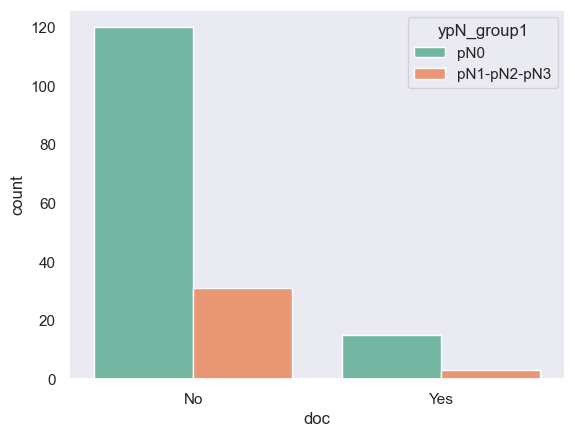

In [96]:
sns.countplot(data=df, x='doc', hue='ypN_group1')
plt.show()

In [97]:
stats.chi2_contingency(pd.crosstab(df['ypN_group1'], df['doc']))

(0.0056928833997829335,
 0.9398557245174327,
 1,
 array([[120.62130178,  14.37869822],
        [ 30.37869822,   3.62130178]]))

In [98]:
cramers_v(df['ypN_group1'], df['doc'])

0.0

In [99]:
pd.crosstab(df['ypN_group2'], df['doc'])

doc,No,Yes
ypN_group2,,
pN0,120,15
pN1,14,3
pN2-pN3,17,0


In [100]:
pd.crosstab(df['ypN_group2'], df['doc'], normalize='index').round(2)

doc,No,Yes
ypN_group2,,
pN0,0.89,0.11
pN1,0.82,0.18
pN2-pN3,1.00,0.00


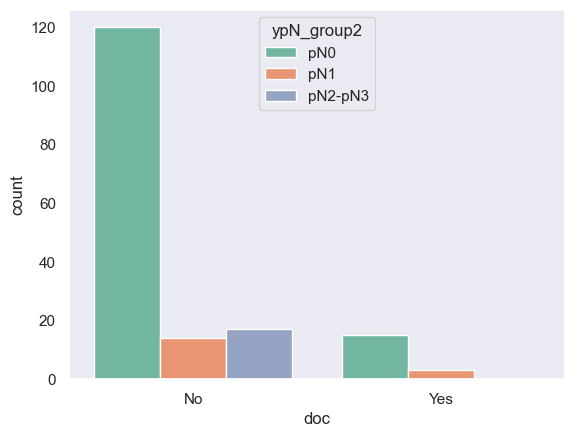

In [101]:
sns.countplot(data=df, x='doc', hue='ypN_group2')
plt.show()

In [102]:
stats.chi2_contingency(pd.crosstab(df['ypN_group2'], df['doc']))

(2.9309036344486286,
 0.23097361004306144,
 2,
 array([[120.62130178,  14.37869822],
        [ 15.18934911,   1.81065089],
        [ 15.18934911,   1.81065089]]))

In [103]:
cramers_v(df['ypN_group2'], df['doc'])

0.07

# Disease-related event

## Disease-related event and age

In [104]:
df.groupby('dre')['age'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
dre,,,,,,,,
No,102.0,66.9,10.2,24.0,63.0,68.0,74.0,86.0
Yes,71.0,65.9,9.4,42.0,59.5,67.0,74.0,82.0


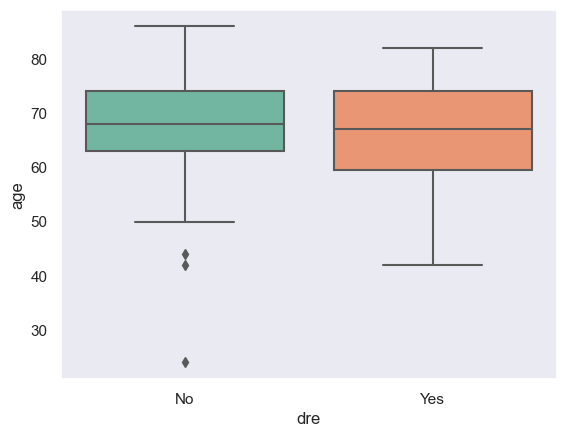

In [105]:
sns.boxplot(data=df, x='dre', y='age')
plt.show()

In [106]:
stats.mannwhitneyu(*[df['age'].values for name, data in df.groupby('dre')])

MannwhitneyuResult(statistic=14964.5, pvalue=1.0)

In [107]:
rank_biserial_correlation(df['dre'], df['age'])

-0.05

## Disease-related event and sex

In [108]:
pd.crosstab(df['sex'], df['dre'])

dre,No,Yes
sex,,
Female,34,16
Male,68,55


In [109]:
pd.crosstab(df['sex'], df['dre'], normalize='index').round(2)

dre,No,Yes
sex,,
Female,0.68,0.32
Male,0.55,0.45


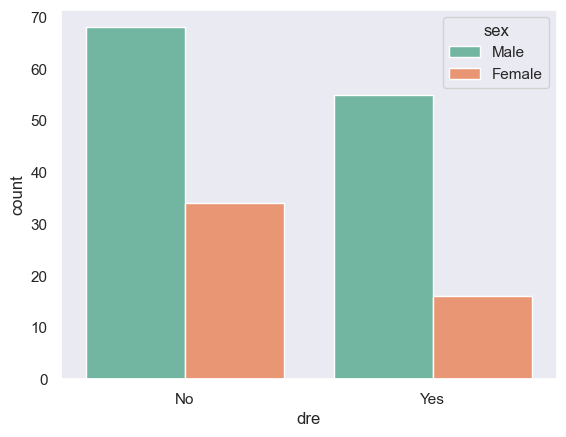

In [110]:
sns.countplot(data=df, x='dre', hue='sex')
plt.show()

In [111]:
stats.chi2_contingency(pd.crosstab(df['sex'], df['dre']))

(1.878913278010163,
 0.17045771219244177,
 1,
 array([[29.47976879, 20.52023121],
        [72.52023121, 50.47976879]]))

In [112]:
cramers_v(df['sex'], df['dre'])

0.07

## Disease-related event and variant histology

In [113]:
pd.crosstab(df['variant_histology'], df['dre'])

dre,No,Yes
variant_histology,,
No,63,47
Yes,39,24


In [114]:
pd.crosstab(df['variant_histology'], df['dre'], normalize='index').round(2)

dre,No,Yes
variant_histology,,
No,0.57,0.43
Yes,0.62,0.38


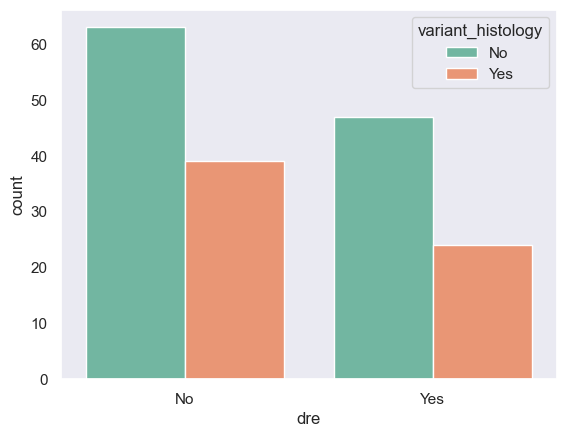

In [115]:
sns.countplot(data=df, x='dre', hue='variant_histology')
plt.show()

In [116]:
stats.chi2_contingency(pd.crosstab(df['variant_histology'], df['dre']))

(0.1895570939999277,
 0.6632855001984674,
 1,
 array([[64.85549133, 45.14450867],
        [37.14450867, 25.85549133]]))

In [117]:
cramers_v(df['variant_histology'], df['dre'])

0.0

## Disease-related event and ypT stage

In [118]:
pd.crosstab(df['ypT_group1'], df['dre'])

dre,No,Yes
ypT_group1,,
pT0-pTa-pTis,15,19
pT2-pT3,87,52


In [119]:
pd.crosstab(df['ypT_group1'], df['dre'], normalize='index').round(2)

dre,No,Yes
ypT_group1,,
pT0-pTa-pTis,0.44,0.56
pT2-pT3,0.63,0.37


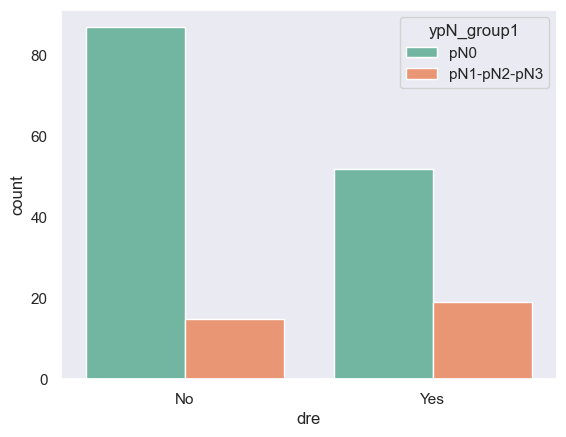

In [120]:
sns.countplot(data=df, x='dre', hue='ypN_group1')
plt.show()

In [121]:
stats.chi2_contingency(pd.crosstab(df['ypT_group1'], df['dre']))

(3.1267367581640135,
 0.0770177628114529,
 1,
 array([[20.04624277, 13.95375723],
        [81.95375723, 57.04624277]]))

In [122]:
cramers_v(df['ypT_group1'], df['dre'])

0.11

In [123]:
pd.crosstab(df['ypT_group2'], df['dre'])

dre,No,Yes
ypT_group2,,
pT0-pTa-pTis,15,19
pT2,42,23
pT3,45,29


In [124]:
pd.crosstab(df['ypT_group2'], df['dre'], normalize='index').round(2)

dre,No,Yes
ypT_group2,,
pT0-pTa-pTis,0.44,0.56
pT2,0.65,0.35
pT3,0.61,0.39


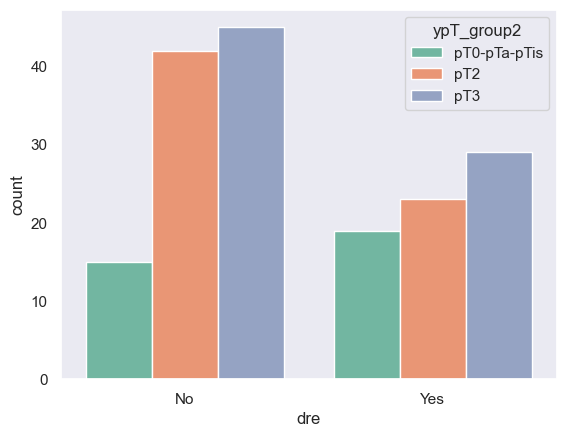

In [125]:
sns.countplot(data=df, x='dre', hue='ypT_group2')
plt.show()

In [126]:
stats.chi2_contingency(pd.crosstab(df['ypT_group2'], df['dre']))

(4.059322666208968,
 0.13138000767434305,
 2,
 array([[20.04624277, 13.95375723],
        [38.32369942, 26.67630058],
        [43.6300578 , 30.3699422 ]]))

In [127]:
cramers_v(df['ypT_group2'], df['dre'])

0.11

## Disease-related event and ypN stage

In [128]:
pd.crosstab(df['ypN_group1'], df['dre'])

dre,No,Yes
ypN_group1,,
pN0,87,52
pN1-pN2-pN3,15,19


In [129]:
pd.crosstab(df['ypN_group1'], df['dre'], normalize='index').round(2)

dre,No,Yes
ypN_group1,,
pN0,0.63,0.37
pN1-pN2-pN3,0.44,0.56


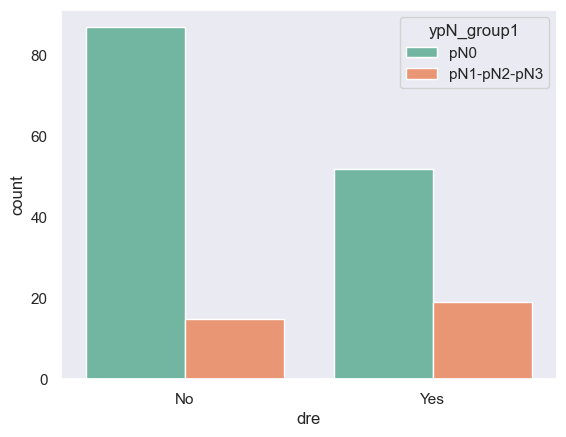

In [130]:
sns.countplot(data=df, x='dre', hue='ypN_group1')
plt.show()

In [131]:
stats.chi2_contingency(pd.crosstab(df['ypN_group1'], df['dre']))

(3.1267367581640135,
 0.0770177628114529,
 1,
 array([[81.95375723, 57.04624277],
        [20.04624277, 13.95375723]]))

In [132]:
cramers_v(df['ypN_group1'], df['dre'])

0.11

In [133]:
pd.crosstab(df['ypN_group2'], df['dre'])

dre,No,Yes
ypN_group2,,
pN0,87,52
pN1,7,10
pN2-pN3,8,9


In [134]:
pd.crosstab(df['ypN_group2'], df['dre'], normalize='index').round(2)

dre,No,Yes
ypN_group2,,
pN0,0.63,0.37
pN1,0.41,0.59
pN2-pN3,0.47,0.53


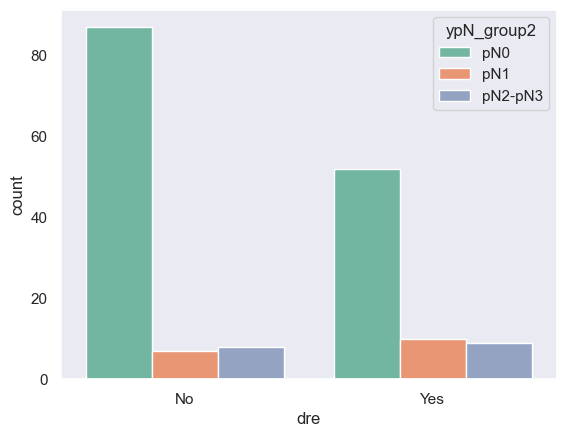

In [135]:
sns.countplot(data=df, x='dre', hue='ypN_group2')
plt.show()

In [136]:
stats.chi2_contingency(pd.crosstab(df['ypN_group2'], df['dre']))

(3.973869922045696,
 0.13711504499914814,
 2,
 array([[81.95375723, 57.04624277],
        [10.02312139,  6.97687861],
        [10.02312139,  6.97687861]]))

In [137]:
cramers_v(df['ypN_group2'], df['dre'])

0.11